In [13]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import 
import numpy as np
from implementations import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [10]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

# standardize
X, mean_X, std_X = standardize(X)

-999 are replaced by the median value of the feature


# Feature names and index

In [11]:
# names of the features 
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]

for ind, name in enumerate(featureNames):
    print(name, '( index:', ind, ')')

DER_mass_MMC ( index: 0 )
DER_mass_transverse_met_lep ( index: 1 )
DER_mass_vis ( index: 2 )
DER_pt_h ( index: 3 )
DER_deltaeta_jet_jet ( index: 4 )
DER_mass_jet_jet ( index: 5 )
DER_prodeta_jet_jet ( index: 6 )
DER_deltar_tau_lep ( index: 7 )
DER_pt_tot ( index: 8 )
DER_sum_pt ( index: 9 )
DER_pt_ratio_lep_tau ( index: 10 )
DER_met_phi_centrality ( index: 11 )
DER_lep_eta_centrality ( index: 12 )
PRI_tau_pt ( index: 13 )
PRI_tau_eta ( index: 14 )
PRI_tau_phi ( index: 15 )
PRI_lep_pt ( index: 16 )
PRI_lep_eta ( index: 17 )
PRI_lep_phi ( index: 18 )
PRI_met ( index: 19 )
PRI_met_phi ( index: 20 )
PRI_met_sumet ( index: 21 )
PRI_jet_num ( index: 22 )
PRI_jet_leading_pt ( index: 23 )
PRI_jet_leading_eta ( index: 24 )
PRI_jet_leading_phi ( index: 25 )
PRI_jet_subleading_pt ( index: 26 )
PRI_jet_subleading_eta ( index: 27 )
PRI_jet_subleading_phi ( index: 28 )
PRI_jet_all_pt ( index: 29 )


# Least squares Gradient descent

0.712611735603
0.712611735603 ? 0.001
True
Gradient Descent(1/149): loss MSE=0.45918278322313527


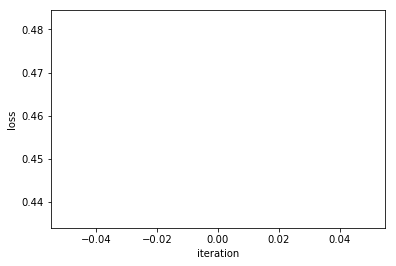

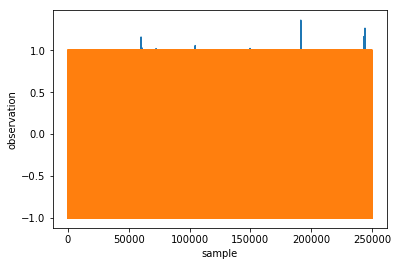

In [23]:
from implementations import least_squares_GD

# input parameters 
initial_w = np.zeros(X.shape[1])
max_iters = 150
gamma = 1e-1

# least squares GD
w_tot, loss_tot = least_squares_GD(y, X, initial_w, max_iters, gamma)

# plot results
plt.figure()
plt.plot(loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(X.dot(w_tot[-1]))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()